# pd.melt() & sns.catplot()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data structures accepted by seaborn
- Long-form vs. Wide-form data
- https://seaborn.pydata.org/tutorial/data_structure.html

In [3]:
import seaborn as sns

In [4]:
##  Long-form: Each variable es a column - Each observation is a row

flights_df = sns.load_dataset('flights')
flights_df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


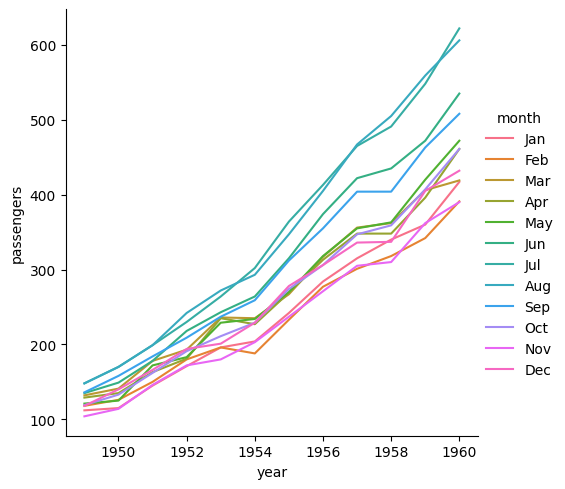

In [5]:
sns.relplot(data=flights_df, x='year', y='passengers', hue='month', kind='line')

In [6]:
## Wide-form: like spreadsheet, each cell contains levels of different variables

flights_wide_df = flights_df.pivot(index='year', columns='month', values='passengers')
flights_wide_df

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [7]:
print(flights_df.shape, flights_df.shape[0] * flights_df.shape[1])
print(flights_wide_df.shape, flights_wide_df.shape[0] * flights_wide_df.shape[1])

(144, 3) 432
(12, 12) 144


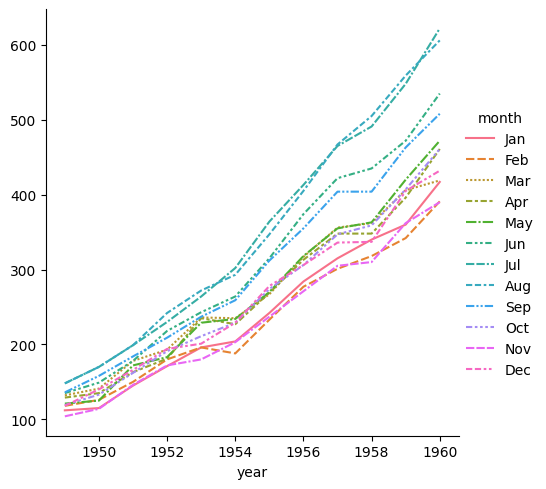

In [8]:
sns.relplot(data=flights_wide_df, kind='line')

In [9]:
flights_wide_df

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot: xlabel='month', ylabel='year'>

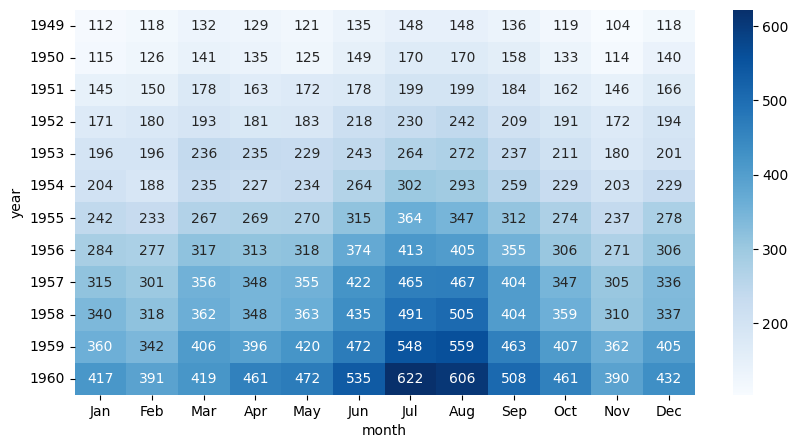

In [10]:
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(data=flights_wide_df, annot=True, fmt='d',  cmap='Blues')

In [11]:
#### Of course can swap rwos and cols
flights_w1_df = flights_df.pivot(index='month', columns='year', values='passengers')
flights_w1_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot: xlabel='year', ylabel='month'>

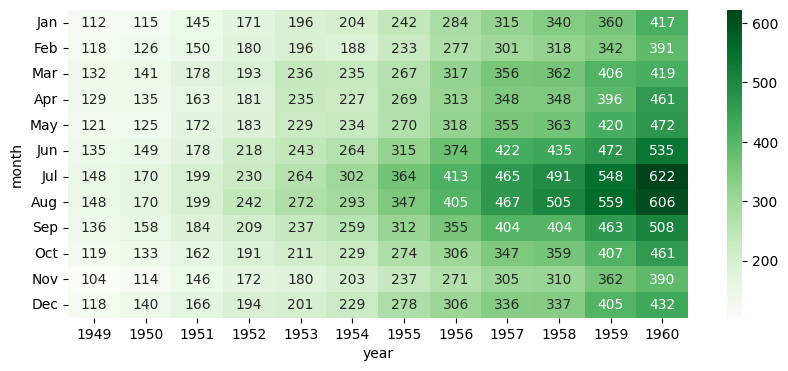

In [12]:
fig = plt.subplots(figsize=(10, 4))
sns.heatmap(data=flights_w1_df, annot=True, fmt='d',  cmap='Greens')

## Messy data - (anagrams - melt)
......

## Pandas.melt
- https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.melt.html
- https://stackoverflow.com/questions/60625159/using-pandas-dataframe-melt-to-plot-data-with-seaborn
- https://stackoverflow.com/questions/51519101/simultaneously-melt-multiple-columns-in-python-pandas

In [13]:
# pandas.melt(frame, id_vars=None, value_vars=None, var_name=None,
#                value_name='value', col_level=None)
# “Unpivots” a DataFrame from wide format to long format, optionally leaving
# identifier variables set.

df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

df1 = pd.DataFrame({'A': ['a', 'b', 'c'],
                    'B': [1, 3, 5],
                    'C': [2, 4, 6]})

display(df, df1)




,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [14]:
# for e/elm in col A, see the column B (var) and get value
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [15]:
# for e/elm in col A, see the column B & C (vars) and get values for each case
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'], var_name='B & C', value_name='myValue')

,A,B & C,myValue
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


#### + Multi-Index Columns

## First Try - melt + seaborn

In [16]:
tmax_df = pd.DataFrame({
    'Sunday': [25, 34.2, 28],
    'Monday': [26.5, 24, 30.1],
    'Tuesday': [18.4, 16, 22],
    'Wednesday': [25, 30, 17]
})

tmax_df.index = ['w1', 'w2', 'w3']
tmax_df                                 # Wide-form Data

,Sunday,Monday,Tuesday,Wednesday
w1,25.0,26.5,18.4,25
w2,34.2,24.0,16.0,30
w3,28.0,30.1,22.0,17


In [17]:
print(tmax_df.index.name)
tmax_df.index.name = 'week_num'
tmax_df.index.name

None


'week_num'

In [18]:
# Melt to make a bar compare char

tmax_df_m1 = tmax_df.reset_index().melt(id_vars='week_num', var_name='weekday', value_name='max_temp')
tmax_df_m1                          # Long-form Data

,week_num,weekday,max_temp
0,w1,Sunday,25.0
1,w2,Sunday,34.2
2,w3,Sunday,28.0
3,w1,Monday,26.5
4,w2,Monday,24.0
5,w3,Monday,30.1
6,w1,Tuesday,18.4
7,w2,Tuesday,16.0
8,w3,Tuesday,22.0
9,w1,Wednesday,25.0


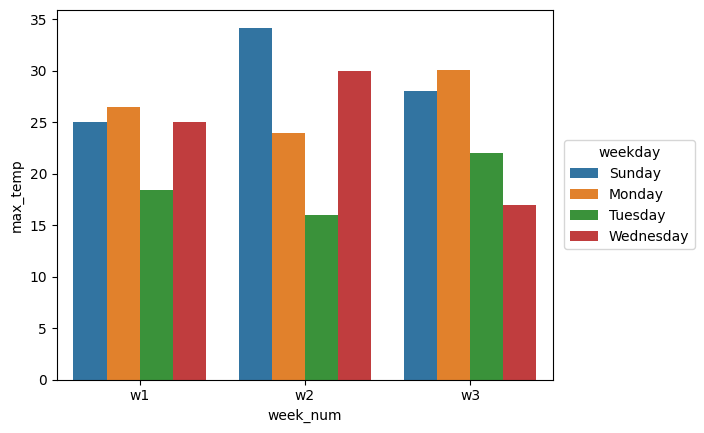

In [19]:
# Long-form --> sns.barplot charts segmented by variables

ax = sns.barplot(data=tmax_df_m1, x='week_num', y='max_temp', hue='weekday')
sns.move_legend(ax, loc="center right", bbox_to_anchor=(1.3, .5))

In [22]:
# sns.barplot(data=tmax_df_m1, x='index', y='value', hue='variable')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='center right', borderaxespad=2)

In [23]:
# Try starting form Long-form (previous case we begin with WIDE-form)
tmax_df_long = tmax_df_m1.copy()
tmax_df_long

,week_num,weekday,max_temp
0,w1,Sunday,25.0
1,w2,Sunday,34.2
2,w3,Sunday,28.0
3,w1,Monday,26.5
4,w2,Monday,24.0
5,w3,Monday,30.1
6,w1,Tuesday,18.4
7,w2,Tuesday,16.0
8,w3,Tuesday,22.0
9,w1,Wednesday,25.0


In [24]:
#flights_df.pivot(index='year', columns='month', values='passengers')
tmax_df_wide = tmax_df_long.pivot(index='week_num', columns='weekday', values='max_temp')
tmax_df_wide

weekday,Monday,Sunday,Tuesday,Wednesday
week_num,,,,
w1,26.5,25.0,18.4,25.0
w2,24.0,34.2,16.0,30.0
w3,30.1,28.0,22.0,17.0


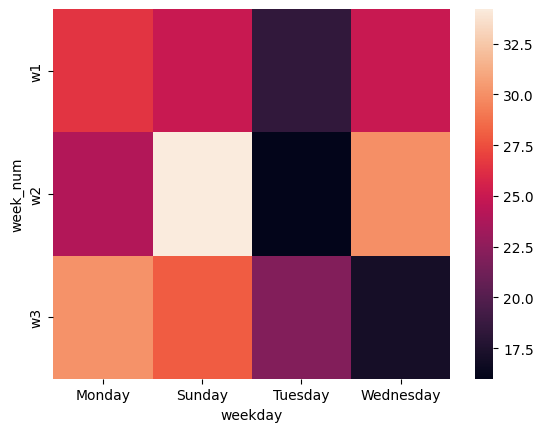

In [25]:
# Wide-form --> heatmap charts (direct ones)

ax = sns.heatmap(data=tmax_df_wide)

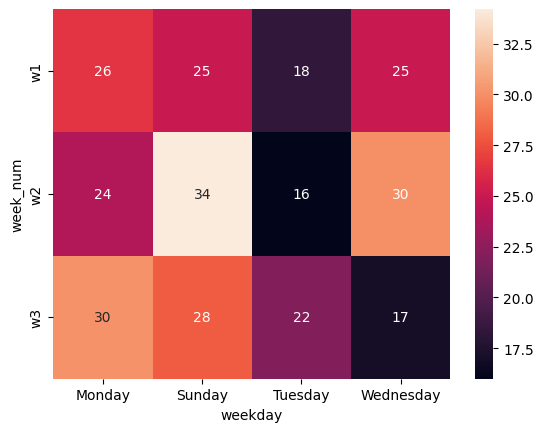

In [26]:
# more data
ax = sns.heatmap(data=tmax_df_wide, annot=True)

<AxesSubplot: xlabel='week_num', ylabel='weekday'>

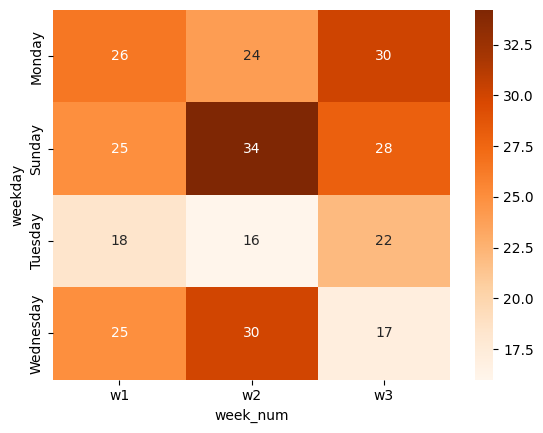

In [27]:
# Another view if i change de Wide-form data in above pivot
tmax_df_wide1 = tmax_df_long.pivot(index='weekday', columns='week_num', values='max_temp')
#tmax_df_wide1
sns.heatmap(tmax_df_wide1, annot=True, cmap='Oranges')

In [38]:
# With medical_examinations.csv

med_df = pd.read_csv('medical_examination.csv')
med_df = med_df.sample(7).copy()

In [39]:
med_df.reset_index()
med_df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
13794,19688,22740,2,161,76.0,180,90,1,1,0,0,1,1
1098,1529,20779,2,175,66.0,120,80,1,1,0,0,1,0
63027,90004,22528,1,168,76.0,120,80,1,1,0,0,0,0
41256,58955,20980,1,165,74.0,100,60,1,1,0,0,1,1
56250,80257,18286,1,151,58.0,120,80,1,1,0,0,1,1
22419,32029,16791,2,180,78.0,110,74,1,2,1,0,1,0
35310,50439,17043,1,170,93.0,110,70,1,1,0,1,0,0
